# Classificação de pacientes com  diabets

Essa é um estudo de técnicas de classificação.<br>
O trabalho utilizará o principio de KDD com:<br>
Definição do problema (Obsjetivo) <br>
Seleção dos dados<br>
Pré processamento<br>
Transformação<br>
Mineração<br>
Avalização dos resultados<br>

### Objetivos

objetivo do trabalho é criar um classificador para identificar pacientes do sexo feminino com diabetes.</br>
esse será um classificado binário com apenas duas classificação.

### Processo de KDD

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Seleção de dados

Utilizando uma biblioteca de dados do Kangle.


In [3]:
basededados = 'diabetes.csv'

In [4]:
dataframe = pd.read_csv(basededados)

In [5]:
dataframe

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Pregnancies                 To express the Number of pregnancies <br>
Glucose                     To express the Glucose level in blood<br>
BloodPressure               To express the Blood pressure measurement<br>
SkinThickness               To express the thickness of the skin<br>
Insulin                     To express the Insulin level in blood<br>
BMI                         To express the Body mass index<br>
DiabetesPedigreeFunction    To express the Diabetes percentage<br>
Age                         To express the age<br>
Outcome                     To express the final result 1 is Yes and 0 is No<br>

#### Pre processamento

In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
dataframe.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Os dados apresentam atributos apenas com valores numerico.</br>
Pela analise descritiva observamos que os atributos possuem escalas muito diferentes e com isso será melhor aplicar na fase de transformação uma mudança de escala antes de passar pelos algoritmos de classificação.

#### Analise dos dados

In [8]:
atributos = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

In [ ]:
atributos = dataframe.columns

In [9]:
atributos

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

#### Distribuição dos dados.

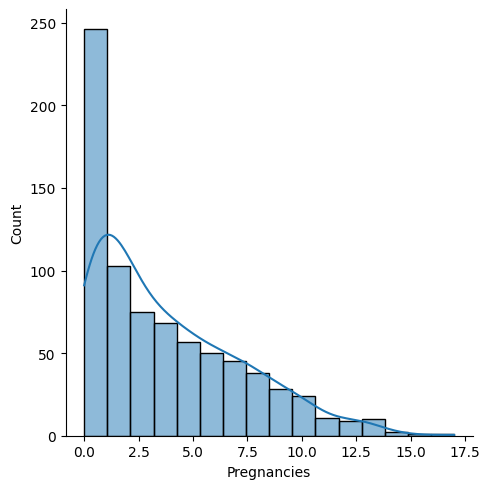

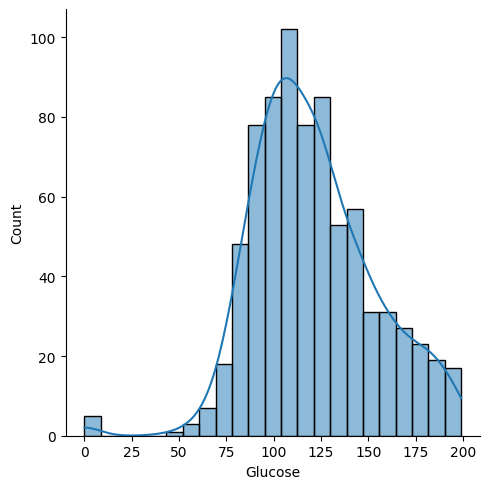

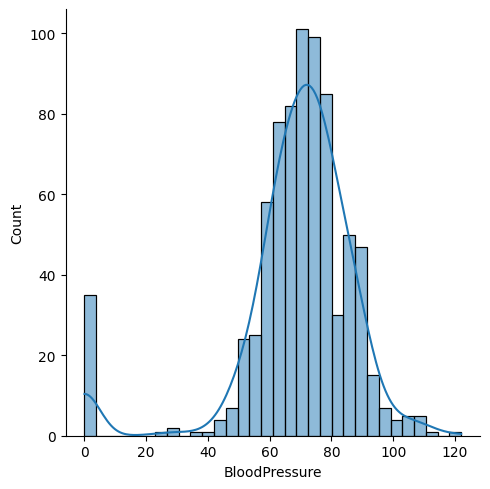

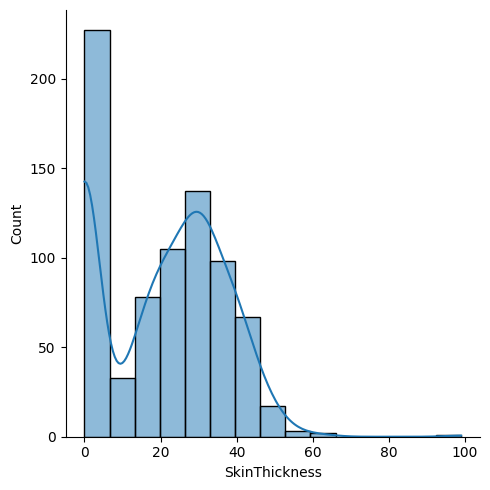

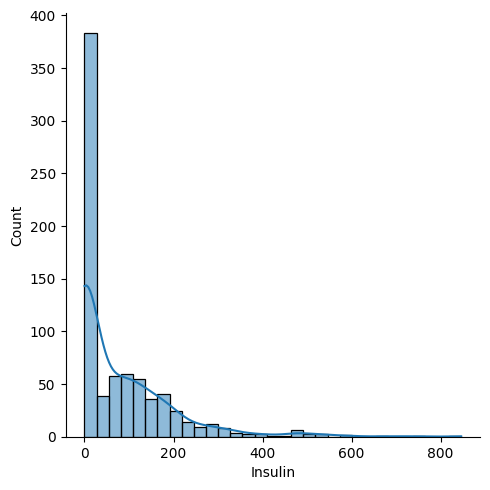

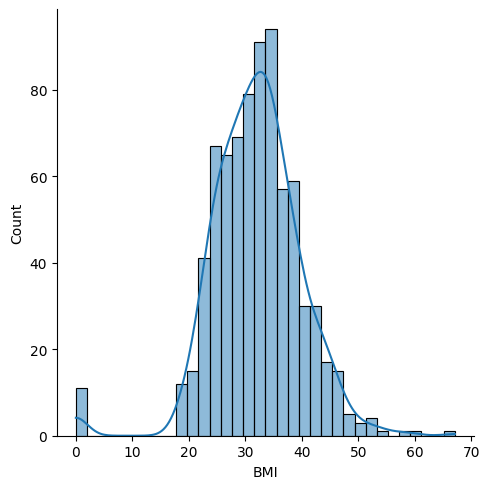

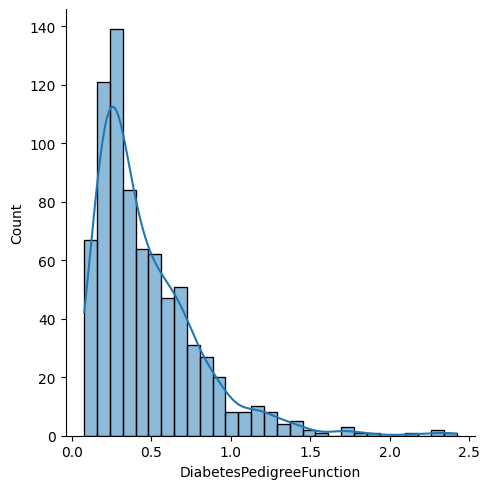

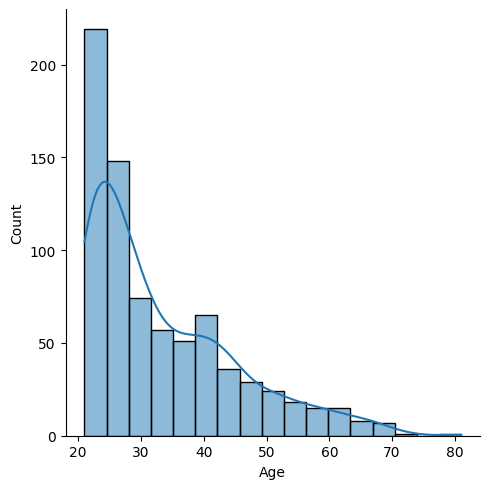

In [10]:
for atributo in atributos:
    sns.displot(dataframe, x = atributo,kde=True)
    

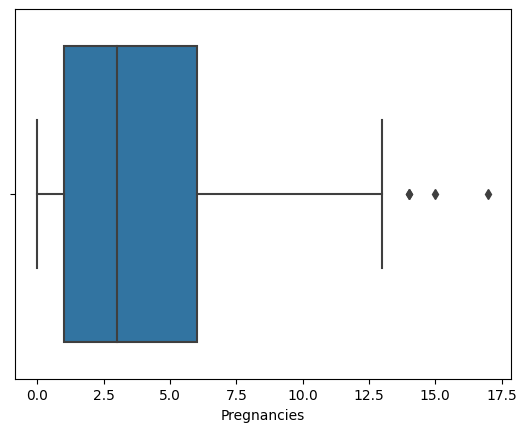

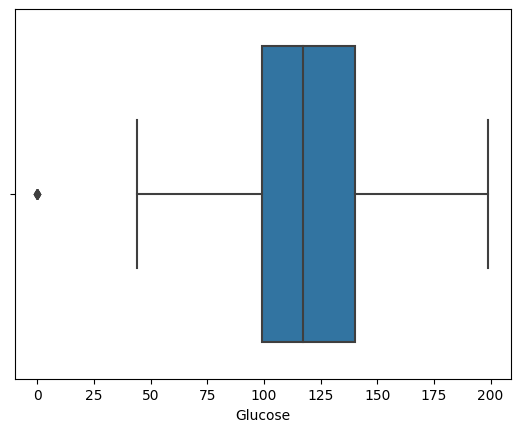

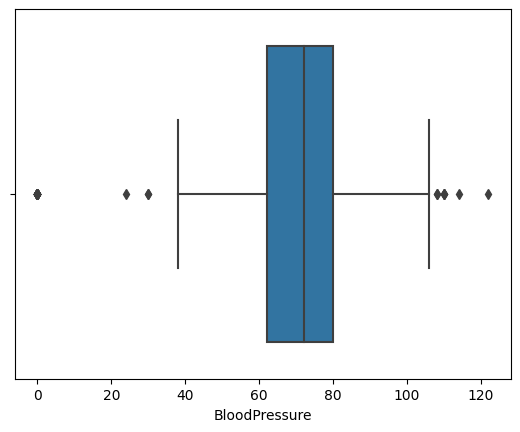

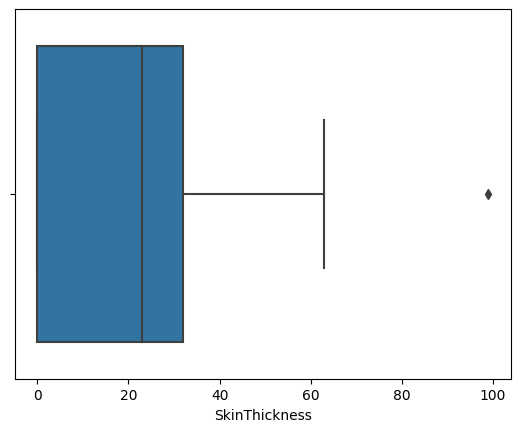

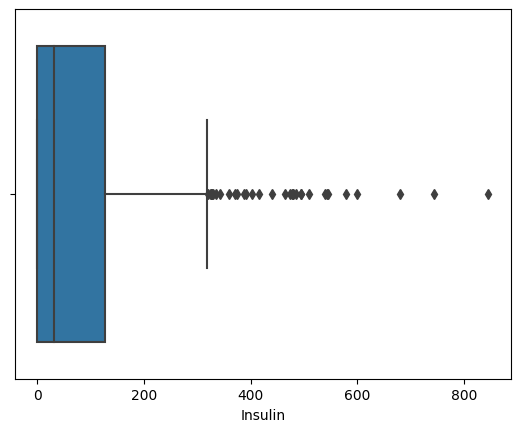

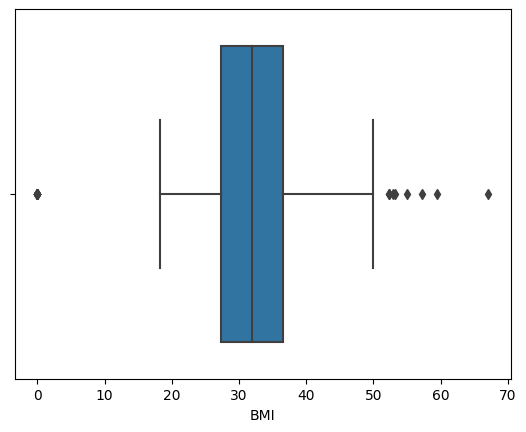

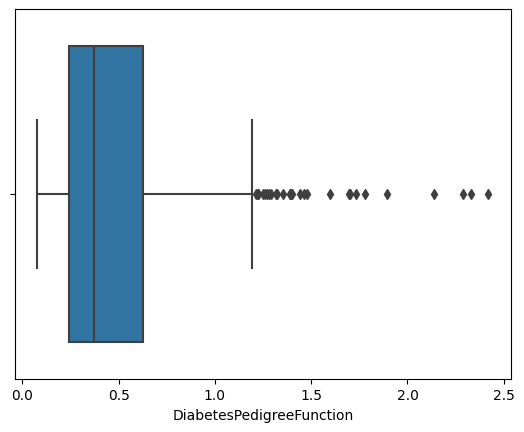

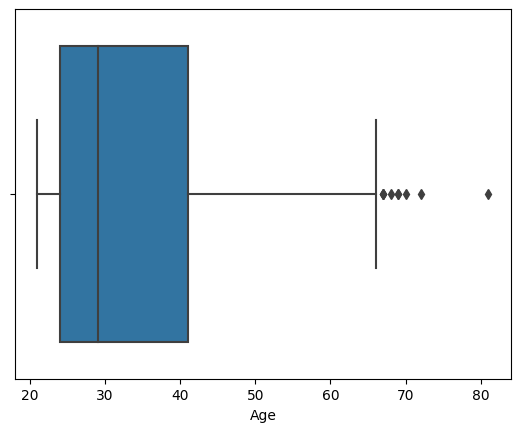

In [12]:
for atributo in atributos:
    sns.boxplot(x= dataframe[atributo], orient='h')
    plt.show()

Alguns atributos que precisam passar por uma limpeza nos dados. <br>
Exemplo:<br>
BMI (indiece de massa corporal) e Blood Pressure (pressão sanguinea) temos valores zero o que mostra uma incosistência<br>
Alguns valores como insulina por exemplo seria bom a consulta com um especialista da área para orientação para analisar os dados e ajudar na melhor tratamento dos dados.


#### Tratando os dados.

substituindo os valores 0 por NaN para 

In [13]:
dataframe[dataframe['Glucose'] == 0].shape

(5, 9)

In [14]:
dataframe['Glucose'].replace(to_replace = 0, value = np.nan, inplace=True)

In [15]:
dataframe[dataframe['BloodPressure'] == 0].shape

(35, 9)

In [16]:
dataframe['BloodPressure'].replace(to_replace = 0, value = np.nan, inplace=True)

In [17]:
dataframe[dataframe['BMI'] == 0].shape

(11, 9)

In [18]:
dataframe['SkinThickness'].replace(to_replace = 0, value = np.nan, inplace=True)

In [19]:
dataframe[dataframe['Insulin'] == 0].shape

(374, 9)

In [20]:
dataframe['Insulin'].replace(to_replace = 0, value = np.nan, inplace=True)

In [21]:
dataframe[dataframe['BMI'] == 0].shape

(11, 9)

In [22]:
dataframe['BMI'].replace(to_replace = 0, value = np.nan, inplace=True)

In [23]:
dataframe.interpolate(limit_direction ="both", inplace = True)

In [24]:
dataframe.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,94.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,94.0,26.6,0.351,31,0
2,8,183.0,64.0,26.0,94.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [25]:
dataframe.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.492839,72.330729,29.080078,158.791016,32.465365,0.471876,33.240885,0.348958
std,3.369578,30.546675,12.207864,9.887474,111.453090,6.889880,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,88.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,130.000000,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,36.000000,190.125000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


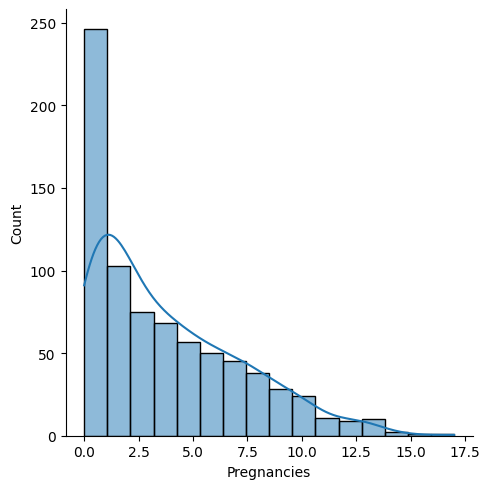

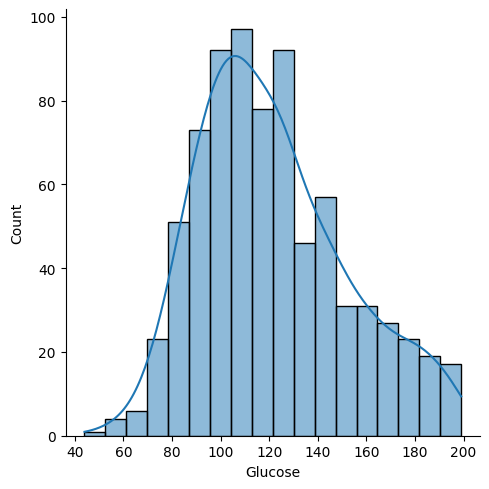

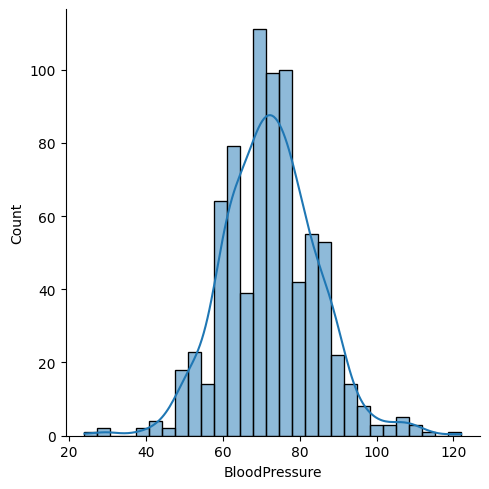

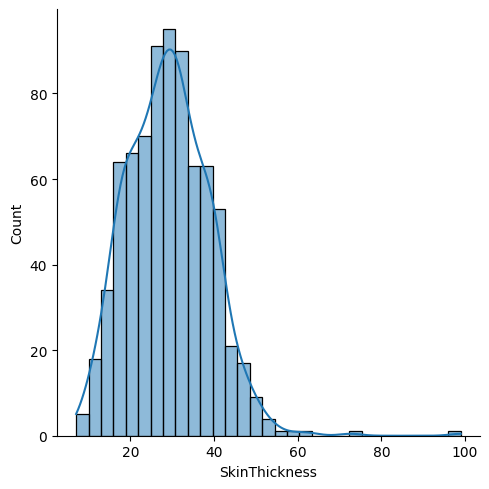

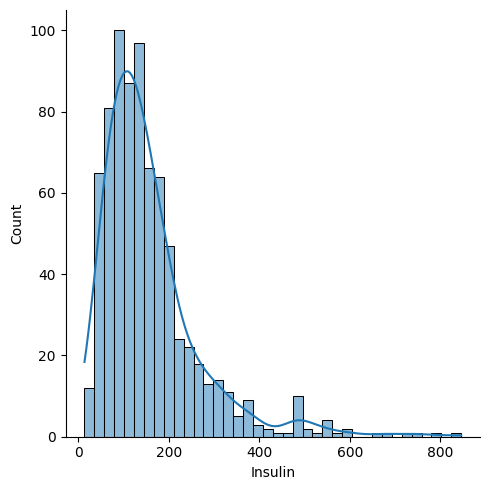

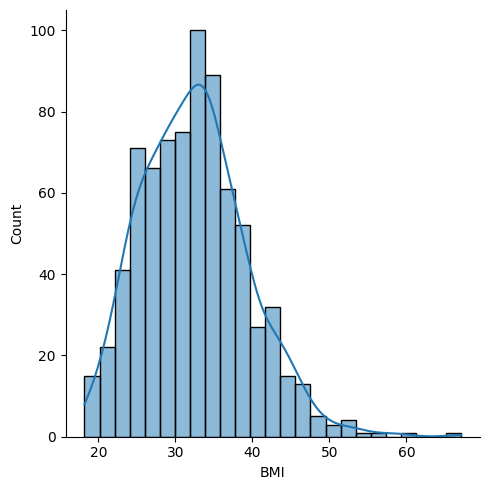

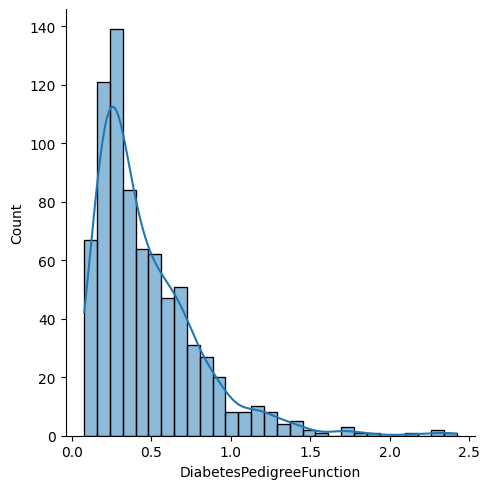

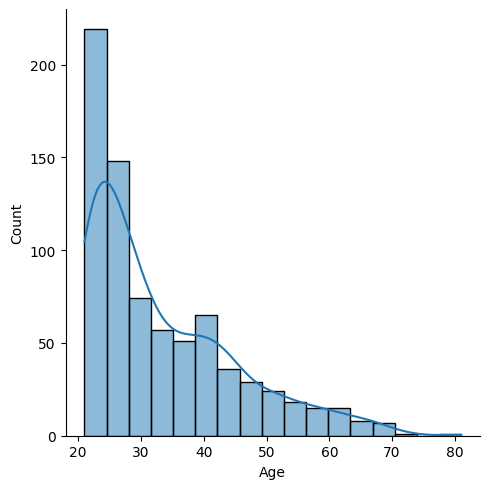

In [26]:
for atributo in atributos:
    sns.displot(dataframe, x = atributo,kde=True)

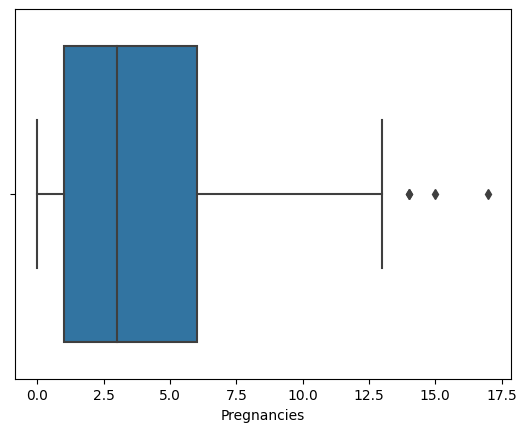

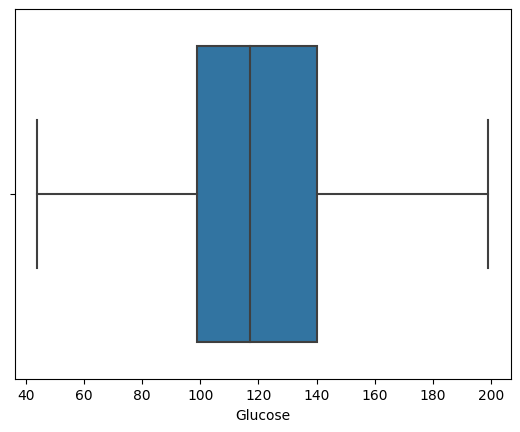

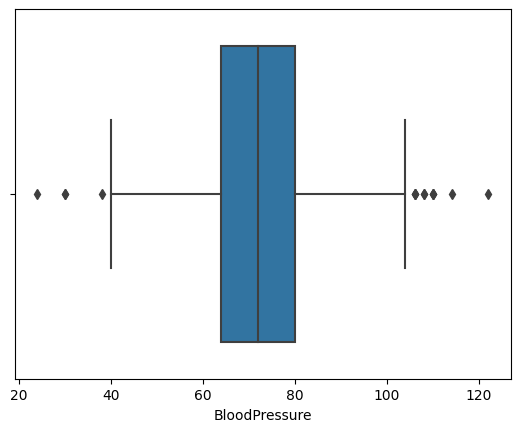

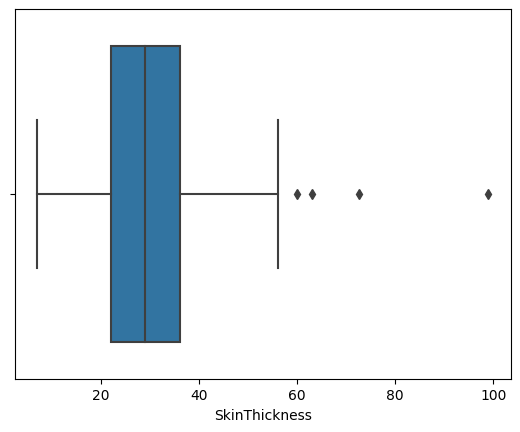

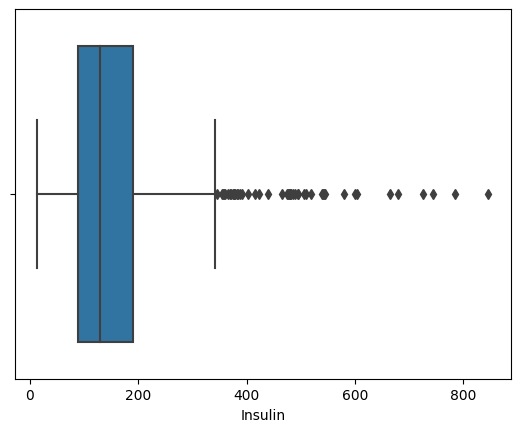

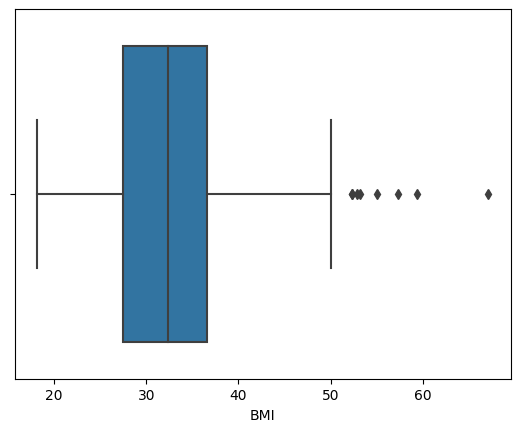

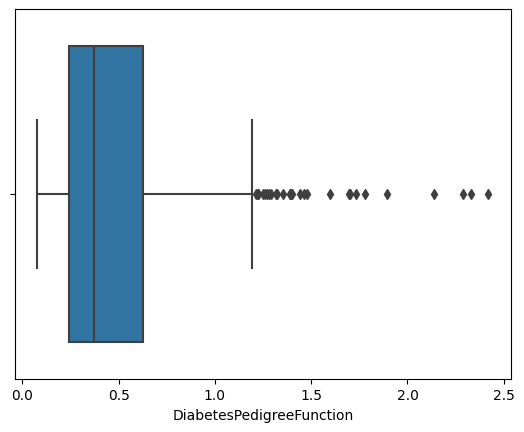

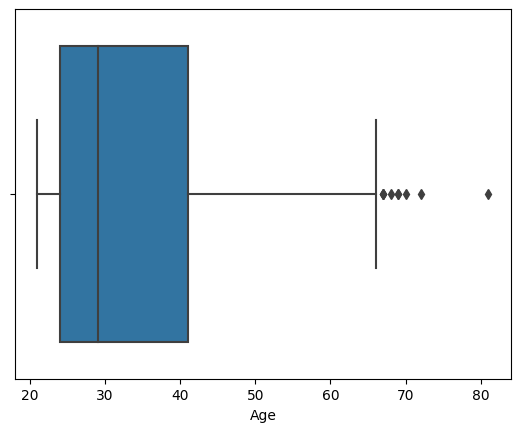

In [27]:
for atributo in atributos:
    sns.boxplot(x= dataframe[atributo], orient='h')
    plt.show()

In [28]:
corr = dataframe.corr()

<AxesSubplot: >

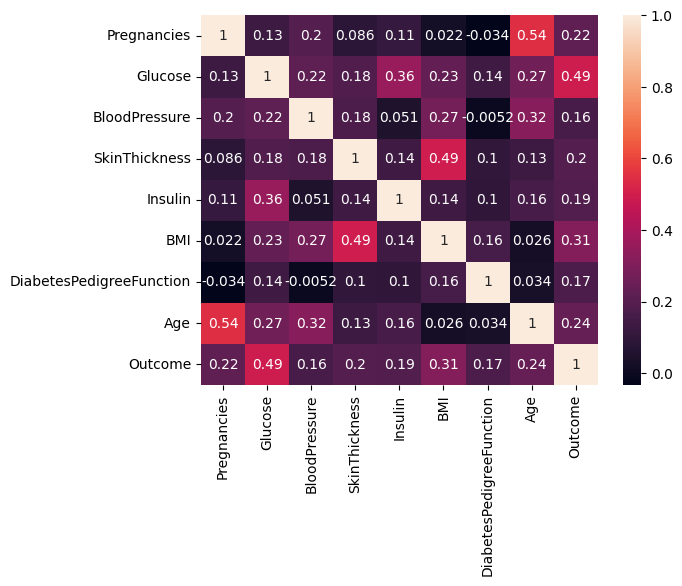

In [29]:
sns.heatmap(corr,annot=True)

#### Transformação

transformação dos dados para que todos os atributos passem a ter a mesma escada. Nesse caso utilizando MinMaxScaler para ter uma escala de 0 a 1

In [30]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


In [31]:
minmax = MinMaxScaler()

In [32]:
minmax = minmax.fit(dataframe)

In [33]:
df_minmax = pd.DataFrame(minmax.transform(dataframe), columns = dataframe.columns)

In [34]:
df_minmax


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.670968,0.489796,0.304348,0.096154,0.314928,0.234415,0.483333,1.0
1,0.058824,0.264516,0.428571,0.239130,0.096154,0.171779,0.116567,0.166667,0.0
2,0.470588,0.896774,0.408163,0.206522,0.096154,0.104294,0.253629,0.183333,1.0
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0.0
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,1.0
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.367742,0.530612,0.445652,0.199519,0.300613,0.039710,0.700000,0.0
764,0.117647,0.503226,0.469388,0.217391,0.158654,0.380368,0.111870,0.100000,0.0
765,0.294118,0.496774,0.489796,0.173913,0.117788,0.163599,0.071307,0.150000,0.0
766,0.058824,0.529032,0.367347,0.217391,0.117788,0.243354,0.115713,0.433333,1.0


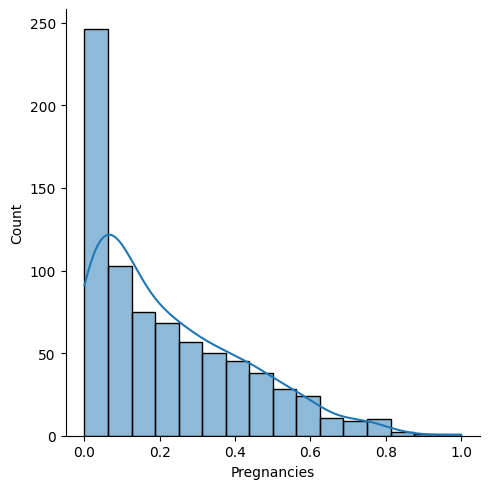

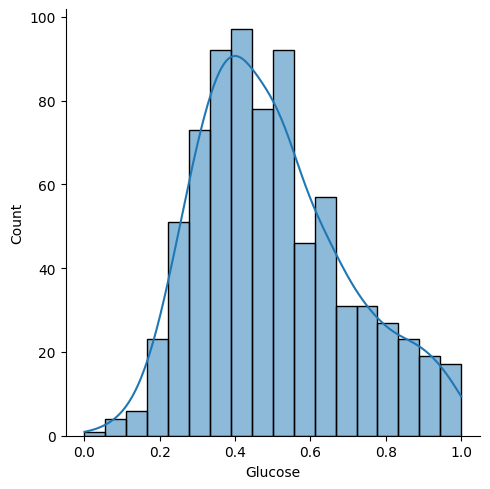

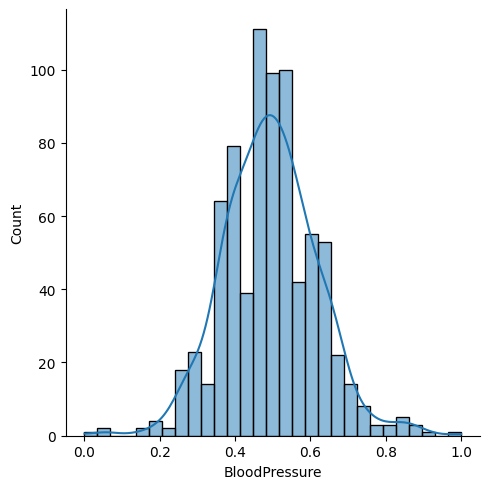

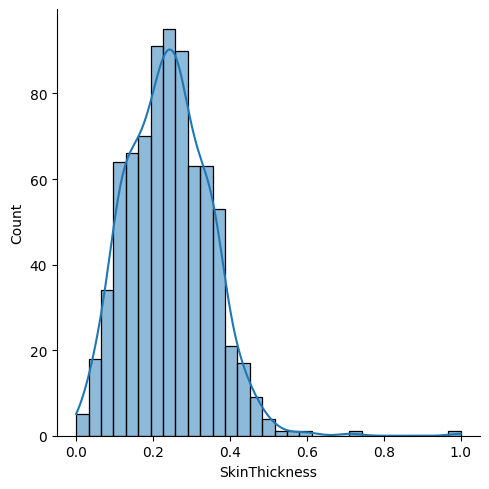

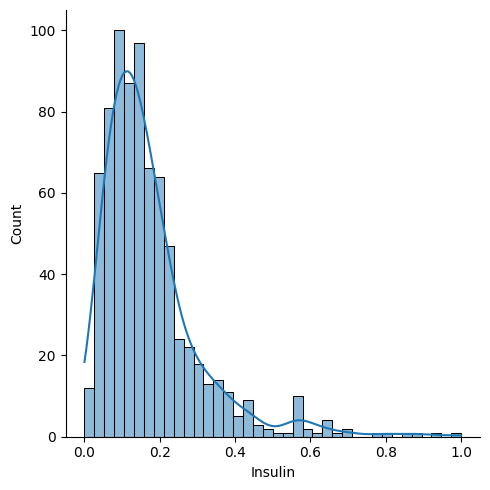

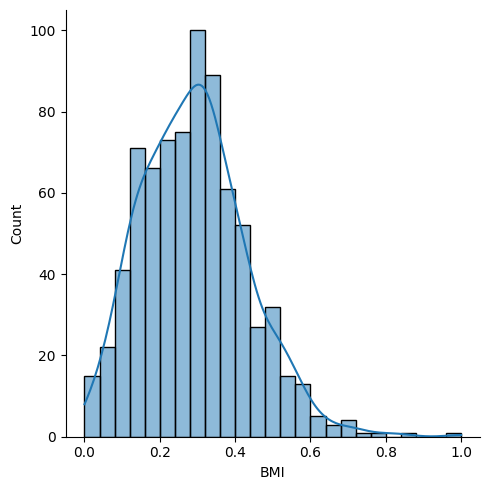

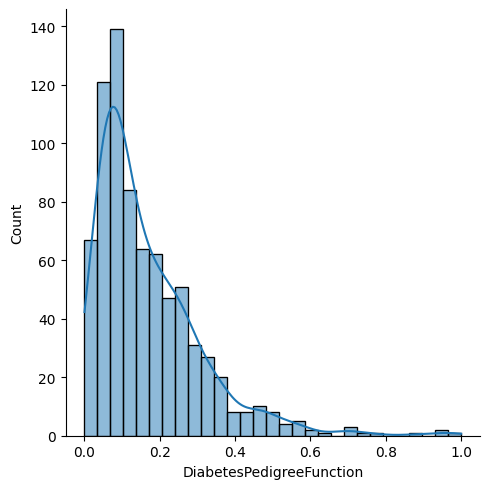

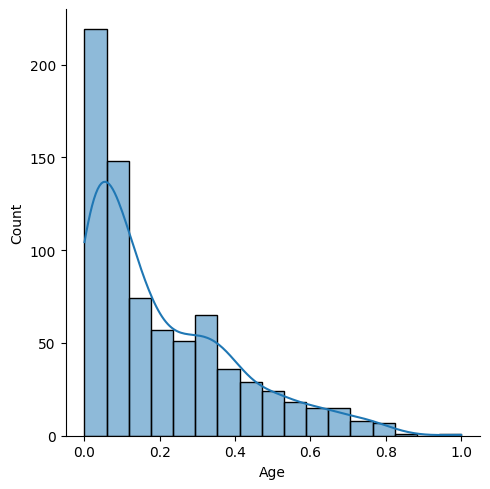

In [35]:
for atributo in atributos:
    sns.displot(df_minmax, x = atributo,kde=True)

#### Inferencia estatistica

In [36]:
import statsmodels.api as sm

In [41]:
x = df_minmax[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
#x = df_minmax[[atributos]]
y = df_minmax['Outcome']

In [43]:
x= sm.add_constant(x)

In [44]:
model = sm.Logit(y,x).fit()

Optimization terminated successfully.
         Current function value: 0.465302
         Iterations 6


In [46]:
print(model.summary())

                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      759
Method:                           MLE   Df Model:                            8
Date:                Fri, 23 Dec 2022   Pseudo R-squ.:                  0.2806
Time:                        07:01:43   Log-Likelihood:                -357.35
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 1.341e-55
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -5.5434      0.521    -10.642      0.000      -6.564      -4.522
Pregnancies                  2.1394      0.550      3.888      0.000       1.061       3.

In [60]:
from scipy.stats import t

In [61]:
df_minmax.shape

(768, 9)

In [62]:
ic = 95 # indice de confiança
n = 768# numero da amostra
k = 8 # numero de variaveis
alpha = (100 - ic)/100
gl = n-(k+1)

In [64]:
tcrit = t.ppf(1-alpha/2,gl)
tcrit

1.9630944119149585

|t|>= tcrit = mantem a variavel

In [76]:
df_minimazado = df_minmax[['Pregnancies','Glucose','BMI','DiabetesPedigreeFunction']]

In [77]:
df_minimazado

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction
0,0.352941,0.670968,0.314928,0.234415
1,0.058824,0.264516,0.171779,0.116567
2,0.470588,0.896774,0.104294,0.253629
3,0.058824,0.290323,0.202454,0.038002
4,0.000000,0.600000,0.509202,0.943638
...,...,...,...,...
763,0.588235,0.367742,0.300613,0.039710
764,0.117647,0.503226,0.380368,0.111870
765,0.294118,0.496774,0.163599,0.071307
766,0.058824,0.529032,0.243354,0.115713


In [81]:
x1 = sm.add_constant(df_minimazado)
modelo1 = sm.Logit(y,x1).fit()

Optimization terminated successfully.
         Current function value: 0.467460
         Iterations 6


In [82]:
print(modelo1.summary())

                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      763
Method:                           MLE   Df Model:                            4
Date:                Fri, 23 Dec 2022   Pseudo R-squ.:                  0.2773
Time:                        12:52:24   Log-Likelihood:                -359.01
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 2.116e-58
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -5.8418      0.423    -13.817      0.000      -6.671      -5.013
Pregnancies                  2.4341      0.467      5.207      0.000       1.518       3.

#### Mineração

In [83]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [84]:
y = df_minmax['Outcome']

In [85]:
X = df_minimazado

In [86]:
X_train, X_teste, y_train, y_teste = train_test_split(X, y, test_size = 0.2, random_state=42)

Testando os algoritmos de Knn, SVM

In [87]:
svm = SVC(kernel = 'linear')

In [88]:
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [89]:
svm_resultado = svm.predict(X_teste)

In [90]:
knn = KNeighborsClassifier()

In [91]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [92]:
knn_resultado = knn.predict(X_teste)

In [93]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

LogisticRegression()

In [94]:
logistic_regression_resultado = logistic_regression.predict(X_teste)

#### Avaliação dos resultados


In [95]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [96]:
score_svm = accuracy_score(y_teste, svm_resultado)
precision_score_svm = precision_score(y_teste, svm_resultado)
recall_score_svm = recall_score(y_teste, svm_resultado)

In [97]:
print("score: " + str(score_svm))
print("precisão:" + str(precision_score_svm))
print("recall: " + str(recall_score_svm))

score: 0.7727272727272727
precisão:0.717391304347826
recall: 0.6


In [98]:
score_knn = accuracy_score(y_teste, knn_resultado)
precision_score_knn = precision_score(y_teste, knn_resultado)
recall_score_knn = recall_score(y_teste, knn_resultado)

In [99]:
print("score: " + str(score_knn))
print("precisão:" + str(precision_score_knn))
print("recall: " + str(recall_score_knn))

score: 0.7597402597402597
precisão:0.6730769230769231
recall: 0.6363636363636364


In [100]:
score_log = accuracy_score(y_teste, logistic_regression_resultado)
precision_score_log = precision_score(y_teste, logistic_regression_resultado)
recall_score_log = recall_score(y_teste, logistic_regression_resultado)

In [101]:
print("score: " + str(score_log))
print("precisão:" + str(precision_score_log))
print("recall: " + str(recall_score_log))

score: 0.7727272727272727
precisão:0.7272727272727273
recall: 0.5818181818181818


In [102]:
X3 = sm.add_constant(X_train)


In [104]:
modelo1 = sm.Logit(y_train,X3).fit()

Optimization terminated successfully.
         Current function value: 0.473782
         Iterations 6


In [110]:
x4 = sm.add_constant(X_teste)


In [111]:
stats_resultado = modelo1.predict(x4)

In [113]:
stats_resultado1 = list(map(round,stats_resultado))

In [ ]:
stats_resultado1

In [115]:
score_stats = accuracy_score(y_teste, stats_resultado1)
precision_score_stats = precision_score(y_teste,stats_resultado1)
recall_score_stats = recall_score(y_teste, stats_resultado1)

In [116]:
print("score: " + str(score_stats))
print("precisão:" + str(precision_score_stats))
print("recall: " + str(recall_score_stats))

score: 0.7857142857142857
precisão:0.7291666666666666
recall: 0.6363636363636364
